In [1]:
import pandas as pd

In [3]:
#import data
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
data.shape

(5000, 7)

In [7]:
# check for any null values
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [10]:
#check for duplicated rows
data[data.duplicated()]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


<Axes: xlabel='Price', ylabel='Count'>

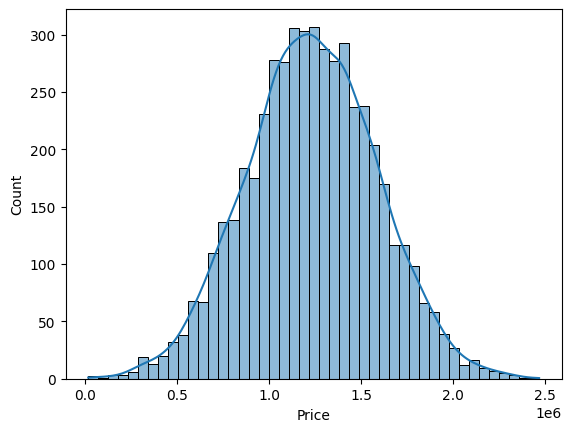

In [12]:
# visualizing the target variable
import seaborn as sns
import matplotlib.pyplot as plt

target = 'Price'
sns.histplot(data[target], kde=True)

In [13]:
# skew of target
print(f"Price skew: {data[target].skew()}")

Price skew: -0.002718064933559366


In [14]:
#standard deviation of target
import numpy as np
print(f"Std deviation of Price: {np.std(data[target])}")

Std deviation of Price: 353082.3130526381


In [15]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [16]:
# separate out numerical and categorical features
cat_feature = ['Address']
numerical_features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']


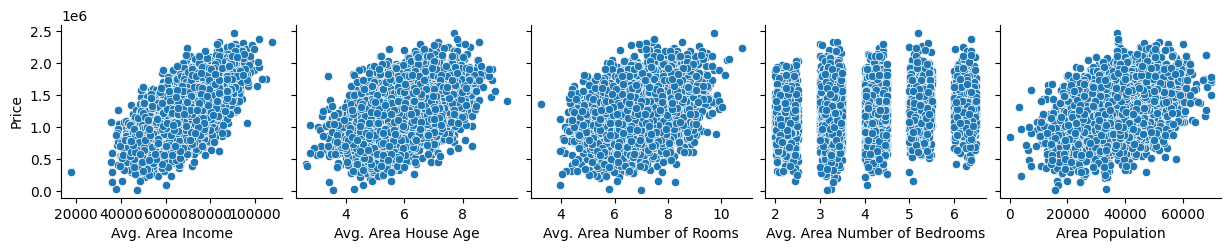

In [17]:
#visualize the numerical features
sns.pairplot(data, x_vars=numerical_features, y_vars=target)

<Axes: xlabel='Avg. Area House Age', ylabel='Avg. Area Number of Rooms'>

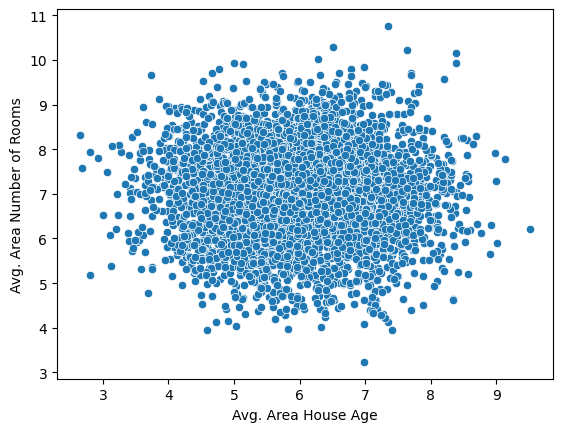

In [18]:
sns.scatterplot(data, x='Avg. Area House Age', y='Avg. Area Number of Rooms')

<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Avg. Area Number of Rooms'>

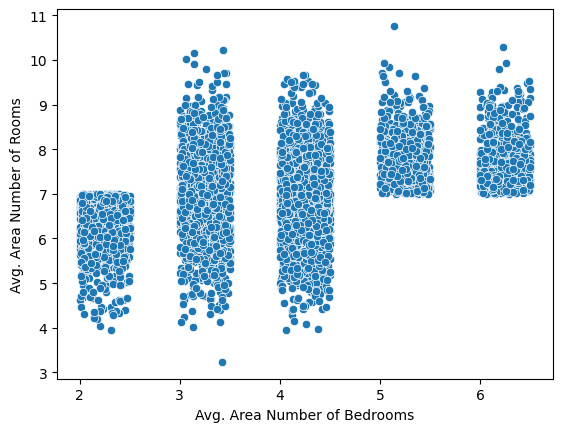

In [19]:
sns.scatterplot(data, x='Avg. Area Number of Bedrooms', y='Avg. Area Number of Rooms')

<Axes: >

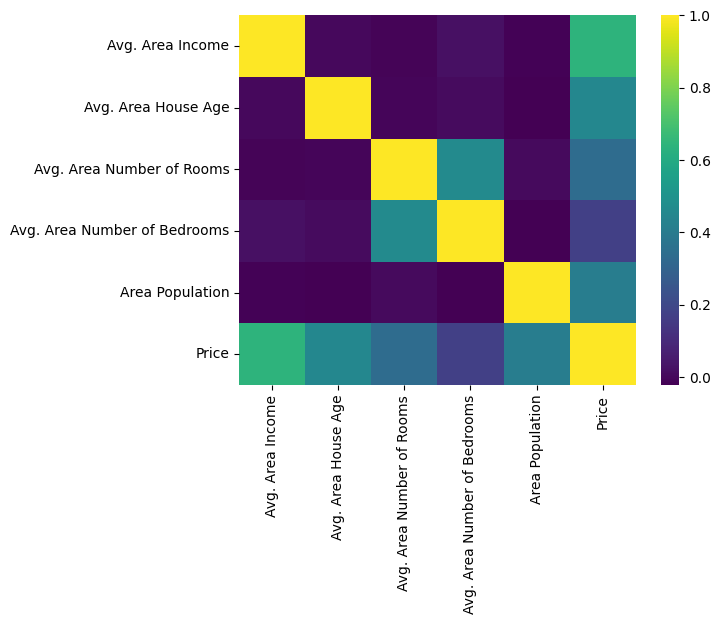

In [25]:
corr_matrix = data[numerical_features + [target]].corr()
sns.heatmap(corr_matrix, cmap='viridis')

In [26]:
# categorical variable
data['Address']

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 5000, dtype: object

In [40]:
data['Address'].iloc[6]

'4759 Daniel Shoals Suite 442\nNguyenburgh, CO 20247'

In [44]:
data.drop('Address', inplace=True, axis=1)

In [88]:
# split data to train and test
from sklearn.model_selection import train_test_split
y = data[target]
X = data[list(set(data.columns) - set(target))]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [101]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def evaluation_metrics(train, predicted):
    r2_score = metrics.r2_score(train, predicted)
    mae = metrics.mean_absolute_error(train, predicted)
    rmse = metrics.mean_squared_error(train, predicted, squared=False)
    return r2_score, mae, rmse

def print_metrics(train, pred):
    r2_score, mae, rmse = evaluation_metrics(train, pred)
    print(f"r2_score: {r2_score}")
    print(f"MAE: {mae}")
    print(f"RMSE {rmse}")


def cross_val(model, x_train, y_train):
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    return cv_scores.mean()

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [103]:
#modeling

# linear regression as baseline model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

#perform cross validation
# cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_scores = cross_val(linear_model, X_train, y_train)
print(f"CV RMSE: {cv_scores}")


linear_model.fit(X_train, y_train)

CV RMSE: -3.124970328390289e-10


LinearRegression()

In [104]:
linear_model.coef_
pd.DataFrame(data={'Coefficient': linear_model.coef_}, index=data.columns)

,Coefficient
Avg. Area Income,6.470504e-12
Avg. Area House Age,3.553775e+05
Avg. Area Number of Rooms,2.082743e-10
Avg. Area Number of Bedrooms,4.990852e-11
Area Population,-9.640644e-11
Price,5.456968e-11


In [105]:
#predict
y_pred_train = linear_model.predict(X_train)
y_pred = linear_model.predict(X_test)

<Axes: xlabel='true observations', ylabel='predicted observations'>

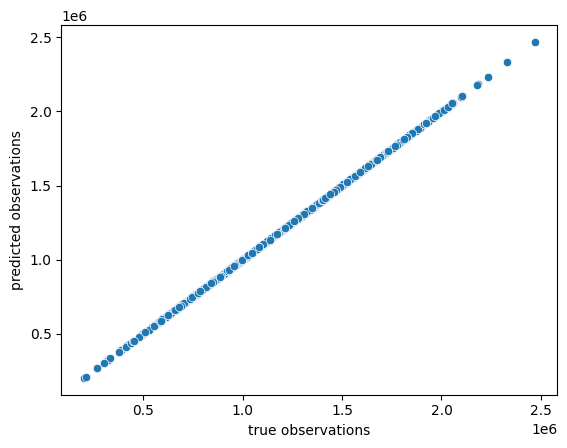

In [106]:
predictions = pd.DataFrame(data={'true observations': y_test, 'predicted observations': y_pred})
sns.scatterplot(predictions, x='true observations', y='predicted observations')

In [107]:
print(f"Train dataset")
print_metrics(y_train, y_pred_train)

print(f"\n Test Dataset")
print_metrics(y_test, y_pred)

result = pd.DataFrame(data=[["Linear Regression", *evaluation_metrics(y_test, y_pred), cv_scores]], columns = ['Model', 'r2_score', 'MAE', 'RMSE', 'CV RMSE'])

Train dataset
r2_score: 1.0
MAE: 1.7941686868046722e-10
RMSE 2.4509847920557885e-10

 Test Dataset
r2_score: 1.0
MAE: 1.7576385289430619e-10
RMSE 2.4414072183629753e-10


In [108]:
# tree based models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

print(f"Train dataset")
print_metrics(y_train, y_pred_train)

print(f"\n Test Dataset")
print_metrics(y_test, y_pred)

result_rf = pd.DataFrame(data=[["Random Forest", *evaluation_metrics(y_test, y_pred), cv_scores]], columns = ['Model', 'r2_score', 'MAE', 'RMSE', 'CV RMSE'])# param_grid = {
result = pd.concat([result_rf, result], ignore_index=True)
#     'max_depth' : [6, 8, 10, 20],
#     'min_samples_leaf' : [1, 3, 5],
# }

# grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
# grid_search.fit(X_train, y_train)
# print(f"Best params: {grid_search.best_params_}")

# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)
# print(f"RMSE is {mean_squared_error(y_test, y_pred, squared=False)}")

Train dataset
r2_score: 0.9999900541489839
MAE: 190.35507981562918
RMSE 1120.755679035573

 Test Dataset
r2_score: 0.9998692259841427
MAE: 481.83555247210694
RMSE 3956.8697388517803


In [113]:
rf_model.feature_importances_

array([9.00999770e-06, 9.99949697e-01, 1.09561148e-05, 1.16409833e-05,
       7.70394880e-06, 1.09916230e-05])

<Axes: xlabel='r2_score', ylabel='Model'>

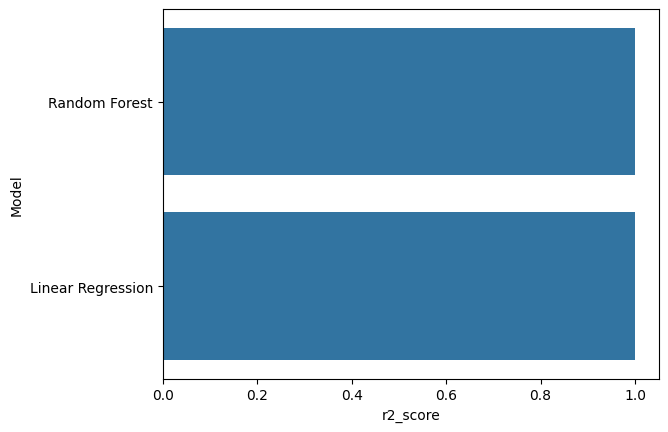

In [112]:
#compare models
sns.barplot(result, y='Model', x='r2_score')

In [109]:
result

,Model,r2_score,MAE,RMSE,CV RMSE
0,Random Forest,0.999869,4.818356e+02,3.956870e+03,-3.124970e-10
0,Linear Regression,1.000000,1.757639e-10,2.441407e-10,-3.124970e-10
